In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# E-10

In [2]:
# Load the data
data = pd.read_csv('data.csv') 

In [3]:
data.fillna(data.mean(), inplace=True)

/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gn/T/ipykernel_1381/1474580016.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [4]:
data.dropna(inplace=True)

In [5]:
data_numeric = data.select_dtypes(include=[np.number])

In [6]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 48057
Data columns (total 77 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       39717 non-null  int64  
 1   population                                 39717 non-null  float64
 2   gdp                                        39717 non-null  float64
 3   cement_co2                                 39717 non-null  float64
 4   cement_co2_per_capita                      39717 non-null  float64
 5   co2                                        39717 non-null  float64
 6   co2_growth_abs                             39717 non-null  float64
 7   co2_growth_prct                            39717 non-null  float64
 8   co2_including_luc                          39717 non-null  float64
 9   co2_including_luc_growth_abs               39717 non-null  float64
 10  co2_including_luc_grow

In [7]:
X = data_numeric.drop(columns=['share_global_co2'])
y = data_numeric['share_global_co2']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten()
])

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))

In [14]:
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)

In [15]:
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])

In [16]:
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)

In [17]:
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 10.6353 - val_loss: 0.7044
Epoch 2/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0048 - val_loss: 0.3177
Epoch 3/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3265 - val_loss: 0.4429
Epoch 4/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2424 - val_loss: 0.1826
Epoch 5/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1893 - val_loss: 0.0914
Epoch 6/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2365 - val_loss: 0.1359
Epoch 7/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1345 - val_loss: 0.2227
Epoch 8/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1440 - val_loss: 0.1418
Epoch 9/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1294 - val_loss: 0.4028
Epoch 10/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1340 - val_loss: 0.0607


In [20]:
mse_e10 = model.evaluate([X_test_cnn, X_test], y_test)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.0616


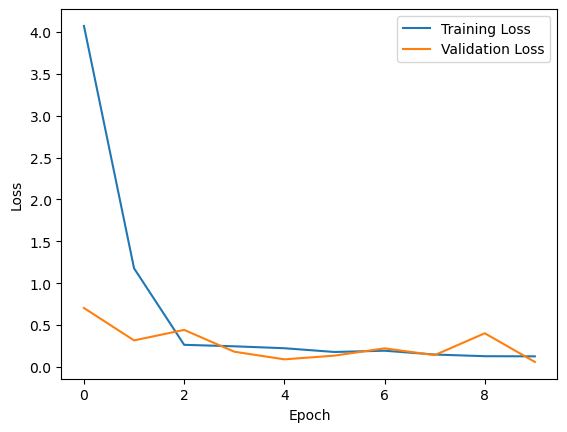

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
predictions = model.predict([X_test_cnn, X_test])

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [23]:
errors = y_test - predictions.flatten()
mae_e10 = np.mean(np.abs(errors))
mse_e10 = np.mean(errors**2)

In [24]:
from sklearn.metrics import r2_score
r2_e10 = r2_score(y_test, predictions)

In [25]:
print("Mean Squared Error:", mse_e10)
print("Mean Absolute Error:", mae_e10)
print("R-squared error:", r2_e10)

Mean Squared Error: 0.05583788245912093
Mean Absolute Error: 0.09690404003488451
R-squared error: 0.9982907294289293


# E-50

In [26]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2428 - val_loss: 0.2048
Epoch 2/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0997 - val_loss: 0.0540
Epoch 3/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1074 - val_loss: 0.0755
Epoch 4/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0995 - val_loss: 0.0813
Epoch 5/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1081 - val_loss: 0.0959
Epoch 6/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1090 - val_loss: 0.0453
Epoch 7/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0790 - val_loss: 0.0426
Epoch 8/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0409 - val_loss: 0.0314
Epoch 9/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0668 - val_loss: 0.0265
Epoch 10/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0523 - val_loss: 0.0391
Epoch 11/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0312 - val_loss: 0.0625
Epoch 12/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [27]:
mse_e50 = model.evaluate([X_test_cnn, X_test], y_test)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.0249


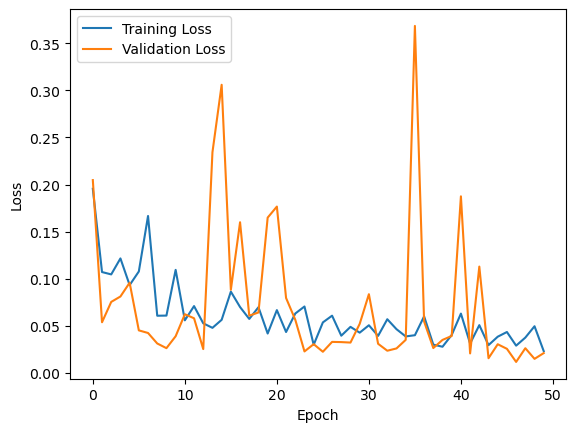

In [28]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
predictions = model.predict([X_test_cnn, X_test])

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step


In [30]:
errors = y_test - predictions.flatten()
mae_e50 = np.mean(np.abs(errors))
mse_e50 = np.mean(errors**2)

In [31]:
from sklearn.metrics import r2_score
r2_e50 = r2_score(y_test, predictions)

In [32]:
print("Mean Squared Error:", mse_e50)
print("Mean Absolute Error:", mae_e50)
print("R-squared error:", r2_e50)

Mean Squared Error: 0.02358351933916457
Mean Absolute Error: 0.04129577618662714
R-squared error: 0.9992780776456159


# E-100

In [33]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0515 - val_loss: 0.0237
Epoch 2/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0225 - val_loss: 0.0247
Epoch 3/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0543 - val_loss: 0.1220
Epoch 4/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0325 - val_loss: 0.0154
Epoch 5/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0118 - val_loss: 0.0297
Epoch 6/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0211 - val_loss: 0.0177
Epoch 7/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0268 - val_loss: 0.0275
Epoch 8/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0188 - val_loss: 0.0585
Epoch 9/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0428 - val_loss: 0.0262
Epoch 10/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0189 - val_loss: 0.0382
Epoch 11/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0241 - val_loss: 0.0200
Epoch 12/100
795/795 ━━━━━━━━━━━━━━━━━━━━

In [34]:
mse_e100 = model.evaluate([X_test_cnn, X_test], y_test)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.0190


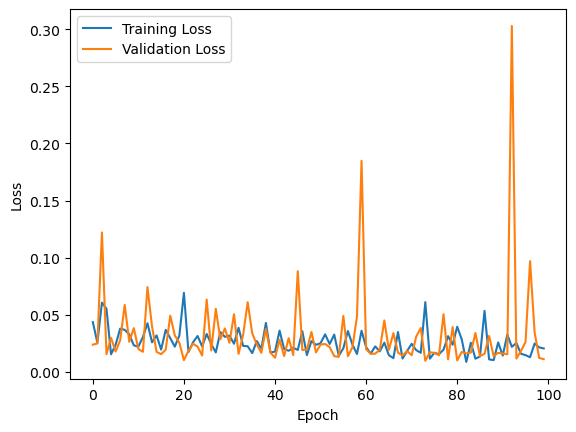

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
predictions = model.predict([X_test_cnn, X_test])

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [37]:
errors = y_test - predictions.flatten()
mae_e100 = np.mean(np.abs(errors))
mse_e100 = np.mean(errors**2)

In [38]:
from sklearn.metrics import r2_score
r2_e100 = r2_score(y_test, predictions)

In [39]:
print("Mean Squared Error:", mse_e100)
print("Mean Absolute Error:", mae_e100)
print("R-squared error:", r2_e100)

Mean Squared Error: 0.012343823557986727
Mean Absolute Error: 0.0356622945858189
R-squared error: 0.9996221394255486


# E-200

In [40]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0108 - val_loss: 0.0212
Epoch 2/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0197 - val_loss: 0.0203
Epoch 3/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0303 - val_loss: 0.0122
Epoch 4/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0128 - val_loss: 0.1619
Epoch 5/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0437 - val_loss: 0.0118
Epoch 6/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0314 - val_loss: 0.0626
Epoch 7/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0181 - val_loss: 0.0131
Epoch 8/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0192 - val_loss: 0.0277
Epoch 9/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0355 - val_loss: 0.0144
Epoch 10/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0144 - val_loss: 0.0779
Epoch 11/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0244 - val_loss: 0.0206
Epoch 12/200
795/795 ━━━━━━━━━━━━━━━━━━━━

Epoch 135/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0116 - val_loss: 0.0149
Epoch 136/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0145 - val_loss: 0.0396
Epoch 137/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0127 - val_loss: 0.0098
Epoch 138/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0147 - val_loss: 0.0130
Epoch 139/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0059 - val_loss: 0.0785
Epoch 140/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0170 - val_loss: 0.0172
Epoch 141/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0077 - val_loss: 0.0117
Epoch 142/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 143/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0102 - val_loss: 0.0219
Epoch 144/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0237 - val_loss: 0.0176
Epoch 145/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0102 - val_loss: 0.0094
Epoch 146/200
795/795

In [46]:
mse_e100 = model.evaluate([X_test_cnn, X_test], y_test)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.0174 


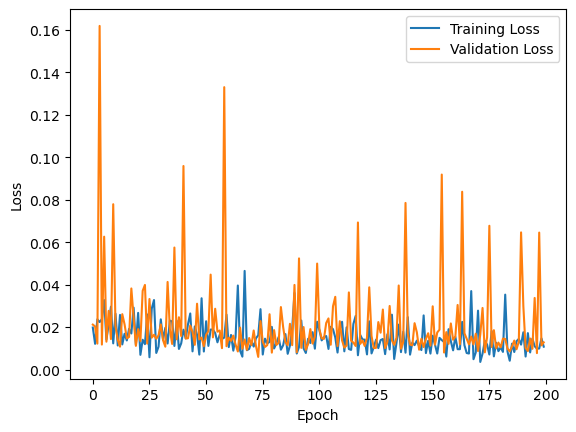

In [47]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
predictions = model.predict([X_test_cnn, X_test])

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step


In [49]:
errors = y_test - predictions.flatten()
mae_e200 = np.mean(np.abs(errors))
mse_e200 = np.mean(errors**2)

In [50]:
from sklearn.metrics import r2_score
r2_e200 = r2_score(y_test, predictions)

In [51]:
print("Mean Squared Error:", mse_e200)
print("Mean Absolute Error:", mae_e200)
print("R-squared error:", r2_e200)

Mean Squared Error: 0.012733508815833423
Mean Absolute Error: 0.026130125716401307
R-squared error: 0.9996102106504252


# Comparision

In [53]:
MSE = []
MAE = []
R = []

MSE.append(mse_e10)
MAE.append(mae_e10)
R.append(r2_e10)

MSE.append(mse_e50)
MAE.append(mae_e50)
R.append(r2_e50)

MSE.append(mse_e100)
MAE.append(mae_e100)
R.append(r2_e100)

MSE.append(mse_e200)
MAE.append(mae_e200)
R.append(r2_e200)

In [54]:
Name = ["epoch-10", "epoch-50","epoch-100","epoch-200"]

# MSE plot

In [55]:
import matplotlib.pyplot as plt

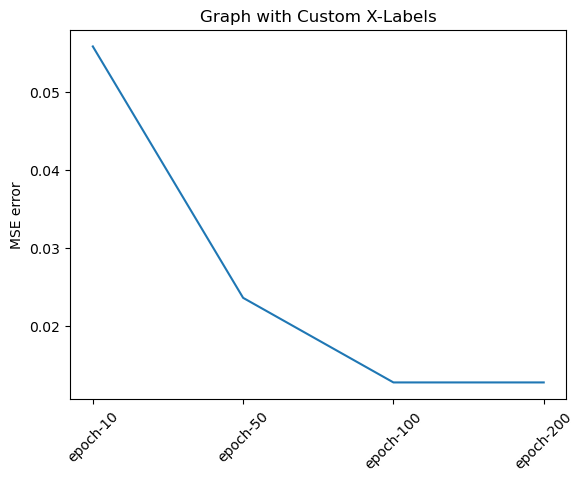

In [56]:
plt.plot(MSE)
plt.xticks(range(len(MSE)), Name, rotation=45)
plt.ylabel('MSE error')
plt.title('Graph with Custom Epoch')
plt.show()

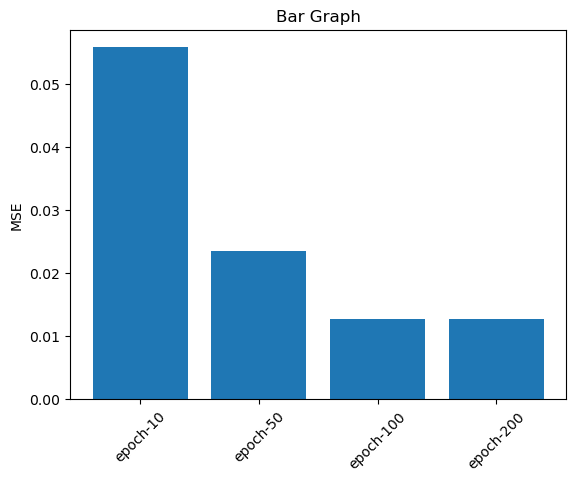

In [58]:
plt.bar(Name,MSE)
plt.xticks(rotation=45)
plt.ylabel('MSE')
plt.title('Bar Graph')
plt.show()

# MAE plot

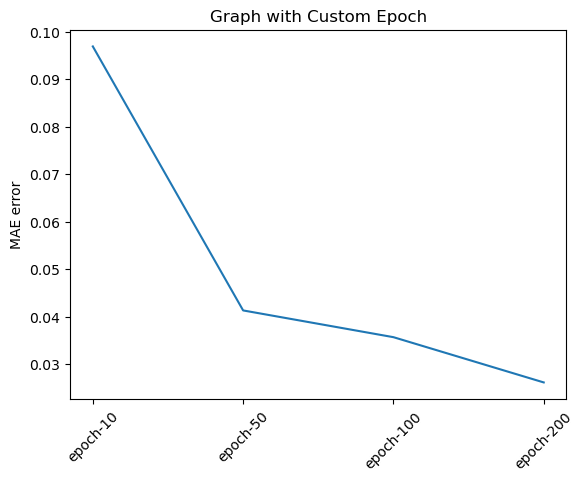

In [60]:
plt.plot(MAE)
plt.xticks(range(len(MAE)), Name, rotation=45)
plt.ylabel('MAE error')
plt.title('Graph with Custom Epoch')
plt.show()

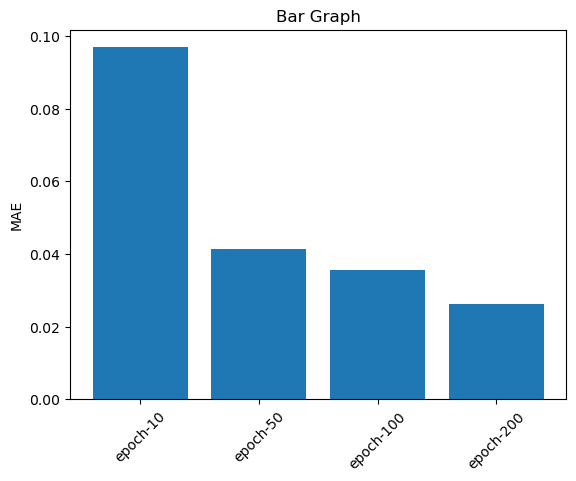

In [62]:
plt.bar(Name,MAE)
plt.xticks(rotation=45)
plt.ylabel('MAE')
plt.title('Bar Graph')
plt.show()

# R-squared 

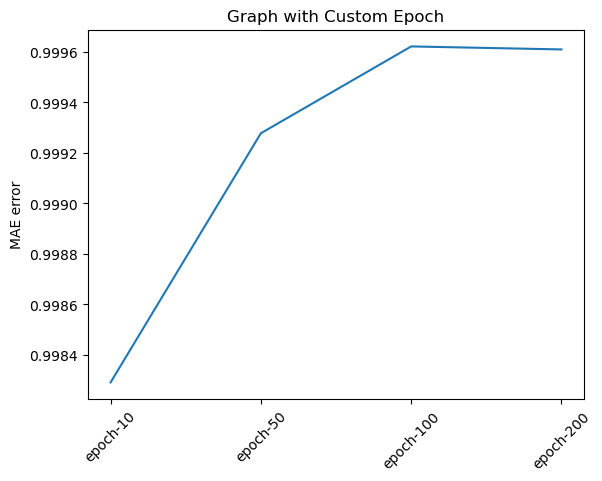

In [63]:
plt.plot(R)
plt.xticks(range(len(R)), Name, rotation=45)
plt.ylabel('MAE error')
plt.title('Graph with Custom Epoch')
plt.show()

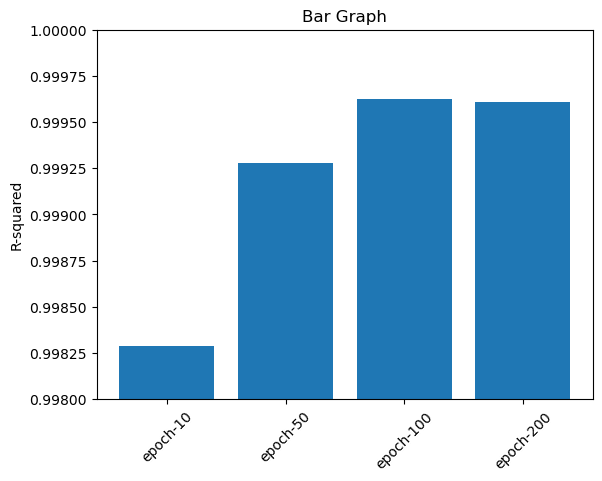

In [65]:
plt.bar(Name,R)
plt.ylim(0.998, 1.0)
plt.xticks(rotation=45)
plt.ylabel('R-squared')
plt.title('Bar Graph')
plt.show()